# Customer and Marketing Analytics

Raisa Nurlatifah

> note:
> churn data & conversion datasets filenames  are changed in this work into this format:
> - `churn_data_yyyy_qq.csv`
> - `convert_data_yyyy_qq.csv`
> <br><br> example:<br> FROM **churn_data_q1_2020** TO **churn_data_2020_q1**

**Outline**

1. Business Understanding
2. Business Process
3. Create Model
4. Metrics for Simulation
5. Simulation
6. Evaluate the Simulation - Metrics
7. Evaluate the Simulation - Variable

---

##  **<font color='blue'>Task 1: Business Understanding</font>**

### Background and Problem Statement

**Background** <br>
The aviation industry relies on customer satisfaction to stay competitive and profitable. Dissatisfied customers may lead to revenue loss. To maintain customer loyalty and attract new passengers, airlines need to understand what factors affect customer experience and take steps to improve their services.

**Problem Statement** <br>
The task is to analyze customer data, uncover insights, and develop a business metrics simulation model.

### Business Objectives and Metrics

**Business Objectives**
- To increase profitability by improving customer satisfaction through data-driven understanding

**Metrics**
- `Repurchase Rate`: Measure the percentage of customers who made a repeat order
- `Average Order Value`: Measure the average amount spent by customers on a certain period 
- `Cost of Repurchase Customer`: Measure the cost to retain the satisfied existing customers
- `Churn Rate`: Measure the percentage of dissatisfied customers who stop using the service
- `Customer Acquisition Cost`: Measure the cost to acquire new customer

### Modeling Task

**Modeling Objective** <br>
Develop `an interpretable predictive model` that identifies the key factors affecting customer satisfaction and simulates its impact on revenue.
    
**Modeling Task** <br>
- `Classify` customers as satisfied or dissatisfied based on certain features and apply them to the business metrics.
- Use `Random Forest Classier` as it can provide feature importance to help understand the satisfaction factors.

**Machine Learning Metrics** <br>
Evaluate model's performance by measuring `Accuracy, Precision, Recall, F1-Score` and `AUC-ROC values`.

---

##  **<font color='blue'>Task 2: Business Process</font>**

### Business Process

**Airplane Flight Service** <br>
Existing customer flow in the aviation industry in general.
![business-process.png](https://i.ibb.co.com/4Q8Xfb0/image.png)

**Machine learning solution** <br>
How machine learning helps the aviation.
![ml-solution.png](https://i.ibb.co.com/B5CfBSjx/image.png)

### Benefit Comparison

**Before Machine Learning** <br>
The conventional customer flow, the customer experience might be less efficient due to ratherly reactive service given by the airline. Customer personalization may be limited and company might need to go through more improvement trial-and-error in any service factors as an attempt to increase customer experience which may be not effective nor efficient for company revenue growth.

**The Advantage of Machine Learning** <br>
Leveraging machine learning can transforms a conventional customer flow into a data-driven personalized and efficient experience by pin pointing the key factors that influance customers overall experience which will improve customers satisfaction. By understanding the key service factors that affects customer experience, it is possible for the airline company to focus on improvement strategy that are efficient yet effective in order to maintain loyal customer, decrease customer churn and acquire new customer. Predictive analytics can help company to gain high customer satisfaction that will directly benefits the company through loss prevention and increased revenue.

---

##  **<font color='blue'>Task 3: Create Model</font>**

### Modeling Workflow

**1. Data validation** <br>
Importing data and data validation

**2. Exploratory Data Analysis**<br>
Descriptive Analysis, Univariate Analysis, and Correlation Analysis

**3. Data Pre-processing**<br>
Missing value handling, feature engineering, and normalization/standardization

**4. Feature Importanace Modeling**<br>
Model fitting and evaluation

**5. Rule-based Modeling**<br>
Rule-based model definition

### Data Validation

**Data Description**

Input Variable:

- `id`: customer unique identifier, numeric.
- `Gender`: customers' gender, nominal (male, female).
- `Customer Type`: customers loyalty class, nominal (loyal, disloyal).
- `Age`: customers' age, numeric
- `Type of Travel`: customers travel purpose class, nominal (personal, business)
- `Class`: customers booked flight class, nominal (eco plus, businesss, eco)
- `Flight Distance`: the distance of a flight, numeric
- `Inflight wifi service`: customers rating on inflight wifi service, ordinal (0 to 5)
- `Departure/Arrival time convenient`: customers rating on convenience of departure/arrival time, ordinal (0 to 5)
- `Ease of Online booking`: customers rating on ease of online booking, ordinal (0 to 5)
- `Gate location`: customers rating on gate location, ordinal (0 to 5)
- `Food and drink`: customers rating on food and drink, ordinal (0 to 5)
- `Online boarding`: customers rating on online boarding, ordinal (0 to 5)
- `Seat comfort`: customers rating on seat comfort, ordinal (0 to 5)
- `Inflight entertainment`: customers rating on inflight entertainment, ordinal (0 to 5)
- `On-board service`: customers rating on on-board service, ordinal (0 to 5)
- `Leg room service`: customers rating on leg room service, ordinal (0 to 5)
- `Baggage handling`: customers rating on baggage handling, ordinal (0 to 5)
- `Checkin service`: customers rating on check-in service, ordinal (0 to 5)
- `Inflight service`: customers rating on inflight service, ordinal (0 to 5)
- `Cleanliness`: customers rating on cleanliness, ordinal (0 to 5)
- `Departure Delay in Minutes`: number minutes that a flight is delayed past its scheduled departure time, numeric.
- `Arrival Delay in Minutes`: number of minutes that a flight is delayed past its scheduled arrival time, numeric.

Target Feature
- `satisfaction`: customer satisfaction class, nominal (satisfied, dissatisfied)

**Load Data**

Load Machine Learning packages

In [28]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

Import training data

In [30]:
# Create a read dataset function 
def read_data(path):
    """
    Reads a CSV file, removes duplicates, and returns a DataFrame.

    Parameters
    ----------
    path : str
        Path to the CSV file.

    Returns
    -------
    pandas.DataFrame
        DataFrame without duplicates.
    """
    
    # 1. Read data
    data = pd.read_csv(path,
                       index_col = 0,
                       low_memory = False) # Disable automatic type inference for memory efficiency

    # 2. Drop duplicates
    data = data.drop_duplicates()

    # 3. print data shape
    print('Data shape :', data.shape)

    return data


In [31]:
# Read data
satisfaction_data = read_data(path = 'satisfaction_df.csv')

Data shape : (103594, 25)


In [32]:
#Check data
satisfaction_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,Dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,Dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,Dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


**Validate Data**

The `Unnamed:0` column is redundant with the index and will have no further use hence will be deleted.

In [35]:
#Drop unnecessary column
satisfaction_data.drop(columns=['Unnamed: 0'], inplace=True)

In [36]:
#Check if ID is unique
print(f'Number of unique customer: {satisfaction_data.id.nunique()}')

Number of unique customer: 103594


Set `id` as Index
- Since every customer is unique
- We can set the `id` as data index
- We can use the `id` as index to keep tracking the predicted outcome according to the index

In [38]:
# set customerID as index
satisfaction_data.set_index('id', inplace=True)

In [39]:
# check the result
satisfaction_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,Dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


In [40]:
# check data duplicate
satisfaction_data.duplicated().sum()

0

In [41]:
#Check missing value
satisfaction_data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [42]:
#Check data type
satisfaction_data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

**Data Validation Summary**
- No duplicated values to handle
- No missing values in the next preprocessing stage
- Encode categorical features
- No need for Train-Test data splitting since test dataset are provided separatedly.

### Data Splitting

- `Satisfaction_df.csv` provides 103594 data for training purpose only. 
- Test set data will be provided on `test.csv`
- The training data will be split into X and y only

**Split Data**

In [47]:
# Create a split input and output function
def split_input_output(data, target_column):
    """
    Splits a DataFrame into input (X) and output (y).

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame.
    
    target_column : str
        Name of the target column.

    Returns
    -------
    X : pandas.DataFrame
        DataFrame containing feature columns.
    
    y : pandas.Series
        Series containing the target variable.
    """
    
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [48]:
# Split input and output
X, y = split_input_output(data = satisfaction_data,
                          target_column = "satisfaction")

In [49]:
# Check data dimension
n_samples, n_features = X.shape

# Print number of samples and features
print(f'Number of samples  :    {n_samples}')
print(f'Number of features :    {n_features}')

Number of samples  :    103594
Number of features :    22


In [50]:
# Count y value
y.value_counts()

satisfaction
Dissatisfied    58697
Satisfied       44897
Name: count, dtype: int64

**Data Splitting Summary**
- The training and validation set data are splitted into 0.7 : 0.3 ratio
- Only training set data will be use in EDA and modeling stages

### Explanatory Data Analysis

In [53]:
# create EDA dataset
eda_df = pd.concat([X, y], axis=1)

In [54]:
# check the result
eda_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,Dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


**Descriptive Analysis**

In [56]:
# Describe
eda_df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


There might be outliers in `Flight Distance`, `Departure Delay in Minutes`, and `Arrival Delay in Minutes` 

**Differentiate Categorical and Numerical data**
- Split between categorical and numerical values. 
- Ordinal is treated as categorical even though it is presented in a numerical format as it serves qualitative data with has mathematical meaning.

Numerical data:
- `Age`
- `Flight Distance`
- `Departure Delay in Minutes`
- `Arrival Delay in Minutes`

The rest of the column are categorical

**Numerical Data Analysis**

In [60]:
# Create a get numerical function
def get_numerical_features(data, numerical_column):
    """
    Extracts numerical features from a DataFrame based on a given list of column names.

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame containing various features.
    
    numerical_column : list of str
        List of column names representing numerical features.

    Returns
    -------
    pandas.DataFrame
        DataFrame containing only the specified numerical columns.
    """
    
    numerical_data = data[numerical_column]
    
    return numerical_data

In [61]:
# Set numerical column
numerical_columns = [
        "Age",
        "Flight Distance",
        "Departure Delay in Minutes",
        "Arrival Delay in Minutes"]

# Differentiate numerical dataframe
num_cols = get_numerical_features(data = eda_df, 
                                  numerical_column = numerical_columns)


# Check numerical data
num_cols.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,
70172,13,460,25,18.0
5047,25,235,1,6.0
110028,26,1142,0,0.0
24026,25,562,11,9.0
119299,61,214,0,0.0


In [62]:
# check numerical columns
print(f'Numerical features : \n{list(num_cols)}')

Numerical features : 
['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [63]:
# List numerical column
num = list(num_cols.columns)

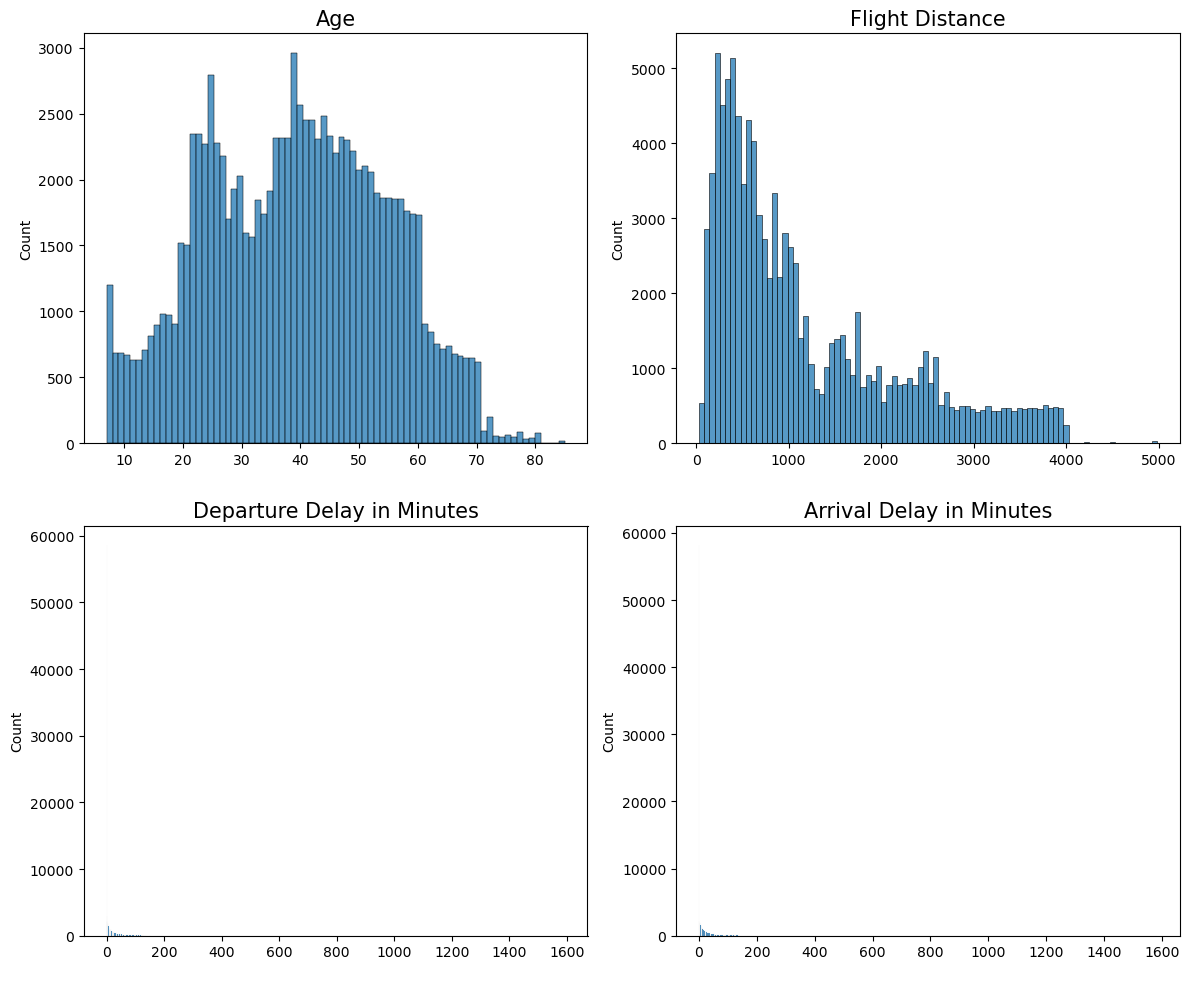

In [64]:
# Create histplot
plt.figure(figsize=(12,10))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.histplot(x=eda_df[num[i]])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

Above graph shows:
- `Age` is somewhat has a normal distribution
- `Flight Distance` has skewed distribution and might have slight outliers
- There are huge potential outliers in `Departure Delay in Minutes` and `Arrival Delay in Minutes`

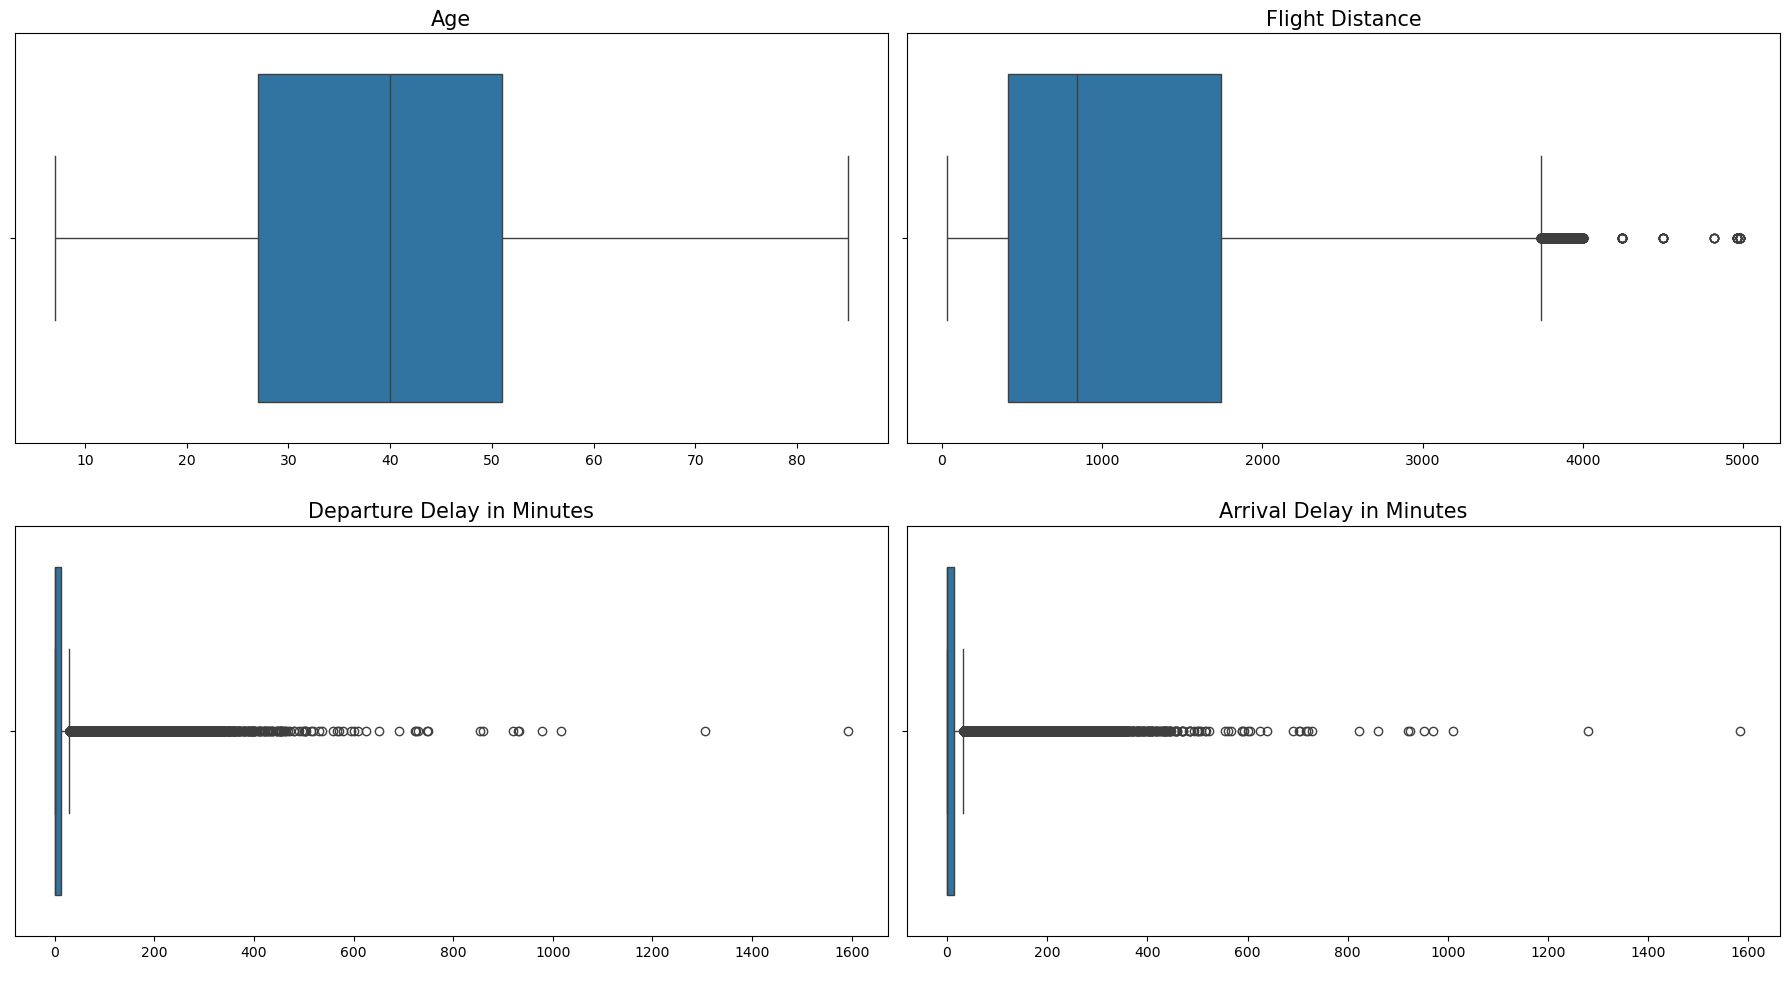

In [66]:
# Create boxplot
plt.figure(figsize=(18,10))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=eda_df[num[i]])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

Above graph confirms that:
- No outlier in `Age`
- `Flight Distance` has outliers
- There are huge numbe of outliers in `Departure Delay in Minutes` and `Arrival Delay in Minutes`

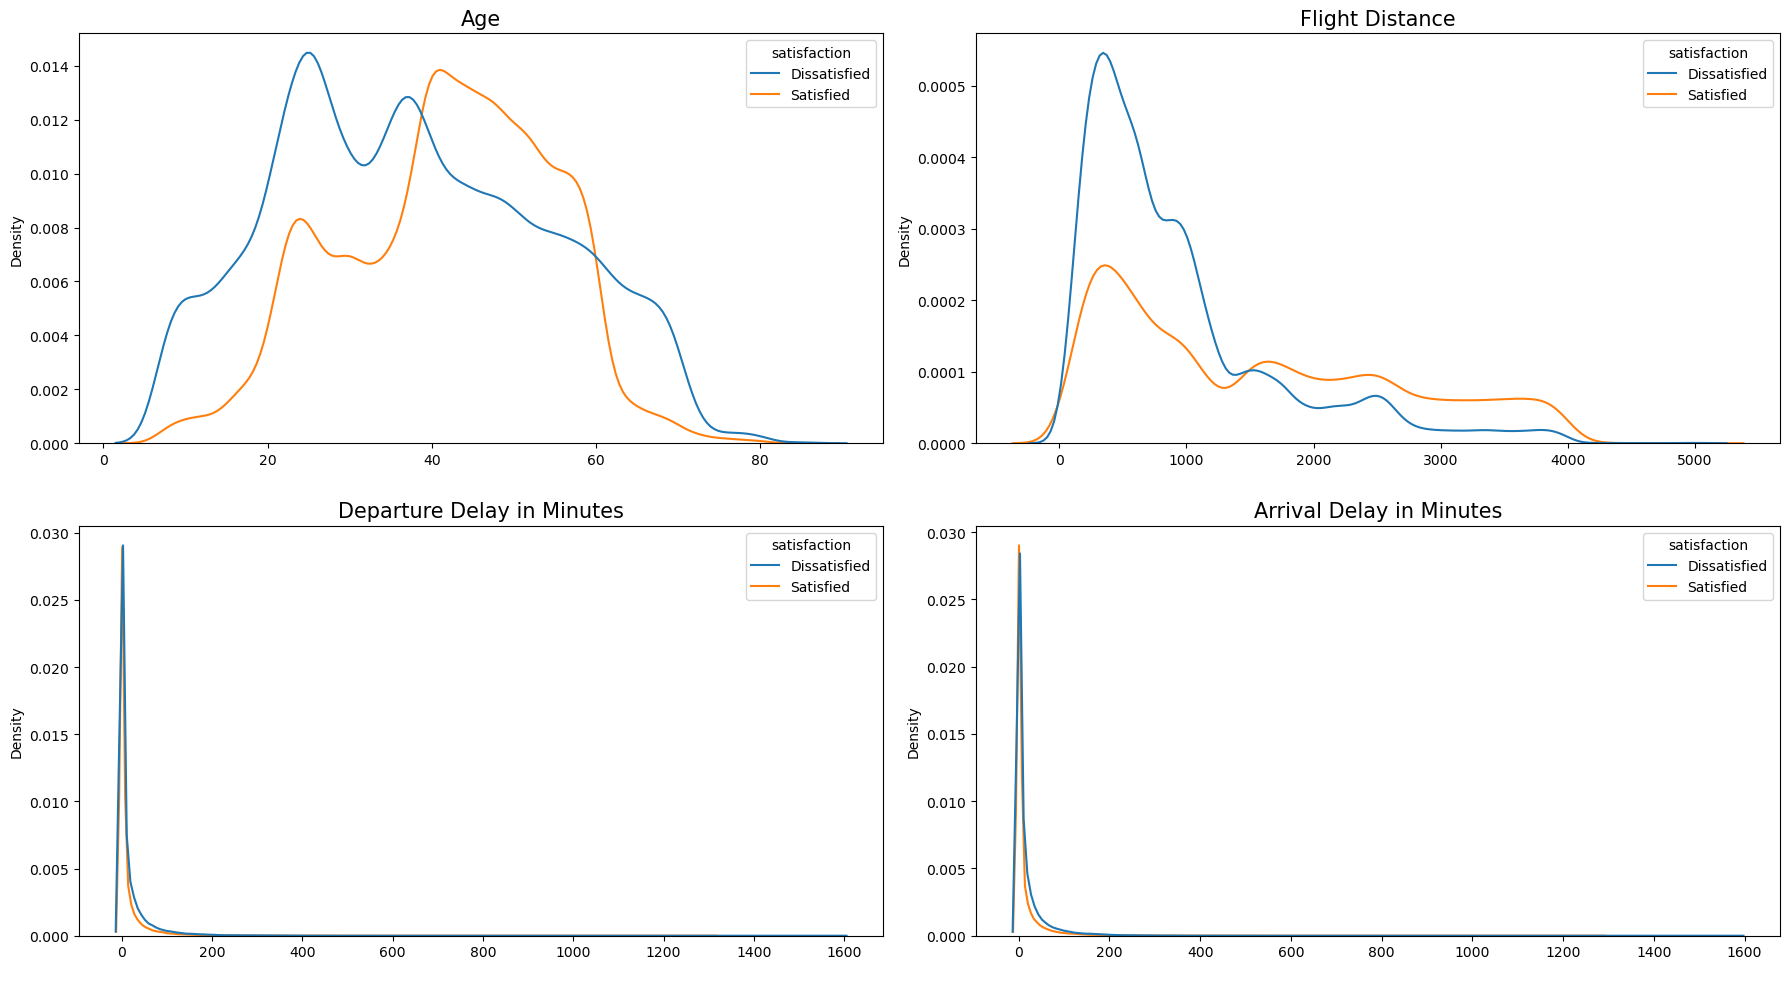

In [68]:
# Create kde plot
plt.figure(figsize=(18,10))
for i in range(0, len(num)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=eda_df[num[i]], hue=eda_df['satisfaction'])
    plt.title(num[i], fontsize=15)
    plt.xlabel(' ')
    plt.tight_layout()

**Categorical Data Analysis**

In [70]:
# Create function to get categorical column list function
def get_categorical_columns(data, y_column, numerical_column):
    """
    Identifies categorical columns by excluding numerical columns and target column(s).

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame containing various features.
    
    y_column : str or list of str
        Target column(s) to exclude from categorical features.
    
    numerical_column : list of str
        List of column names representing numerical features.

    Returns
    -------
    list of str
        List of categorical column names.
    """
    
    X_column = set(data.columns).difference(set(y_column))

    categorical_columns = X_column.difference(set(numerical_columns))
    cat_list = list(categorical_columns)
    
    return cat_list

# Create function to get categorical dataframe
def extract_categorical_data(data, categorical_column):
    """
    Selects categorical columns from a DataFrame based on a given list of column names.

    Parameters
    ----------
    data : pandas.DataFrame
        Input DataFrame containing various features.
    
    categorical_column : list of str
        List of column names representing categorical features.

    Returns
    -------
    pandas.DataFrame
        DataFrame containing only the specified categorical columns.
    """
    
    categorical_data = data[categorical_column]
    
    return categorical_data

In [71]:
# Set target variable to drop
y_column = ['satisfaction']

# Get categorical column names
categorical_columns = get_categorical_columns(data = eda_df,
                                              y_column = y_column,
                                              numerical_column = numerical_columns 
                                              )

# Extract categorical data
cat_cols = extract_categorical_data(data = eda_df, 
                                    categorical_column = categorical_columns)

# Display first few rows of categorical data
cat_cols.head()

,Gate location,Checkin service,Leg room service,On-board service,Food and drink,Type of Travel,Customer Type,Class,Inflight wifi service,Ease of Online booking,Baggage handling,Seat comfort,Gender,Cleanliness,Online boarding,Departure/Arrival time convenient,Inflight service,Inflight entertainment
id,,,,,,,,,,,,,,,,,,
70172,1,4,3,4,5,Personal Travel,Loyal Customer,Eco Plus,3,3,4,5,Male,5,3,4,5,5
5047,3,1,5,1,1,Business travel,disloyal Customer,Business,3,3,3,1,Male,1,3,2,4,1
110028,2,4,3,4,5,Business travel,Loyal Customer,Business,2,2,4,5,Female,5,5,2,4,5
24026,5,1,5,2,2,Business travel,Loyal Customer,Business,2,5,3,2,Female,2,2,5,4,2
119299,3,3,4,3,4,Business travel,Loyal Customer,Business,3,3,4,5,Male,3,5,3,3,3


In [72]:
# check categorical columns
print(f'Categorical features : \n{list(cat_cols)}')

Categorical features : 
['Gate location', 'Checkin service', 'Leg room service', 'On-board service', 'Food and drink', 'Type of Travel', 'Customer Type', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Baggage handling', 'Seat comfort', 'Gender', 'Cleanliness', 'Online boarding', 'Departure/Arrival time convenient', 'Inflight service', 'Inflight entertainment']


In [73]:
# List categorical column
cat = list(cat_cols.columns)

print(f'Number Categorical features : {len(cat)}')

Number Categorical features : 18


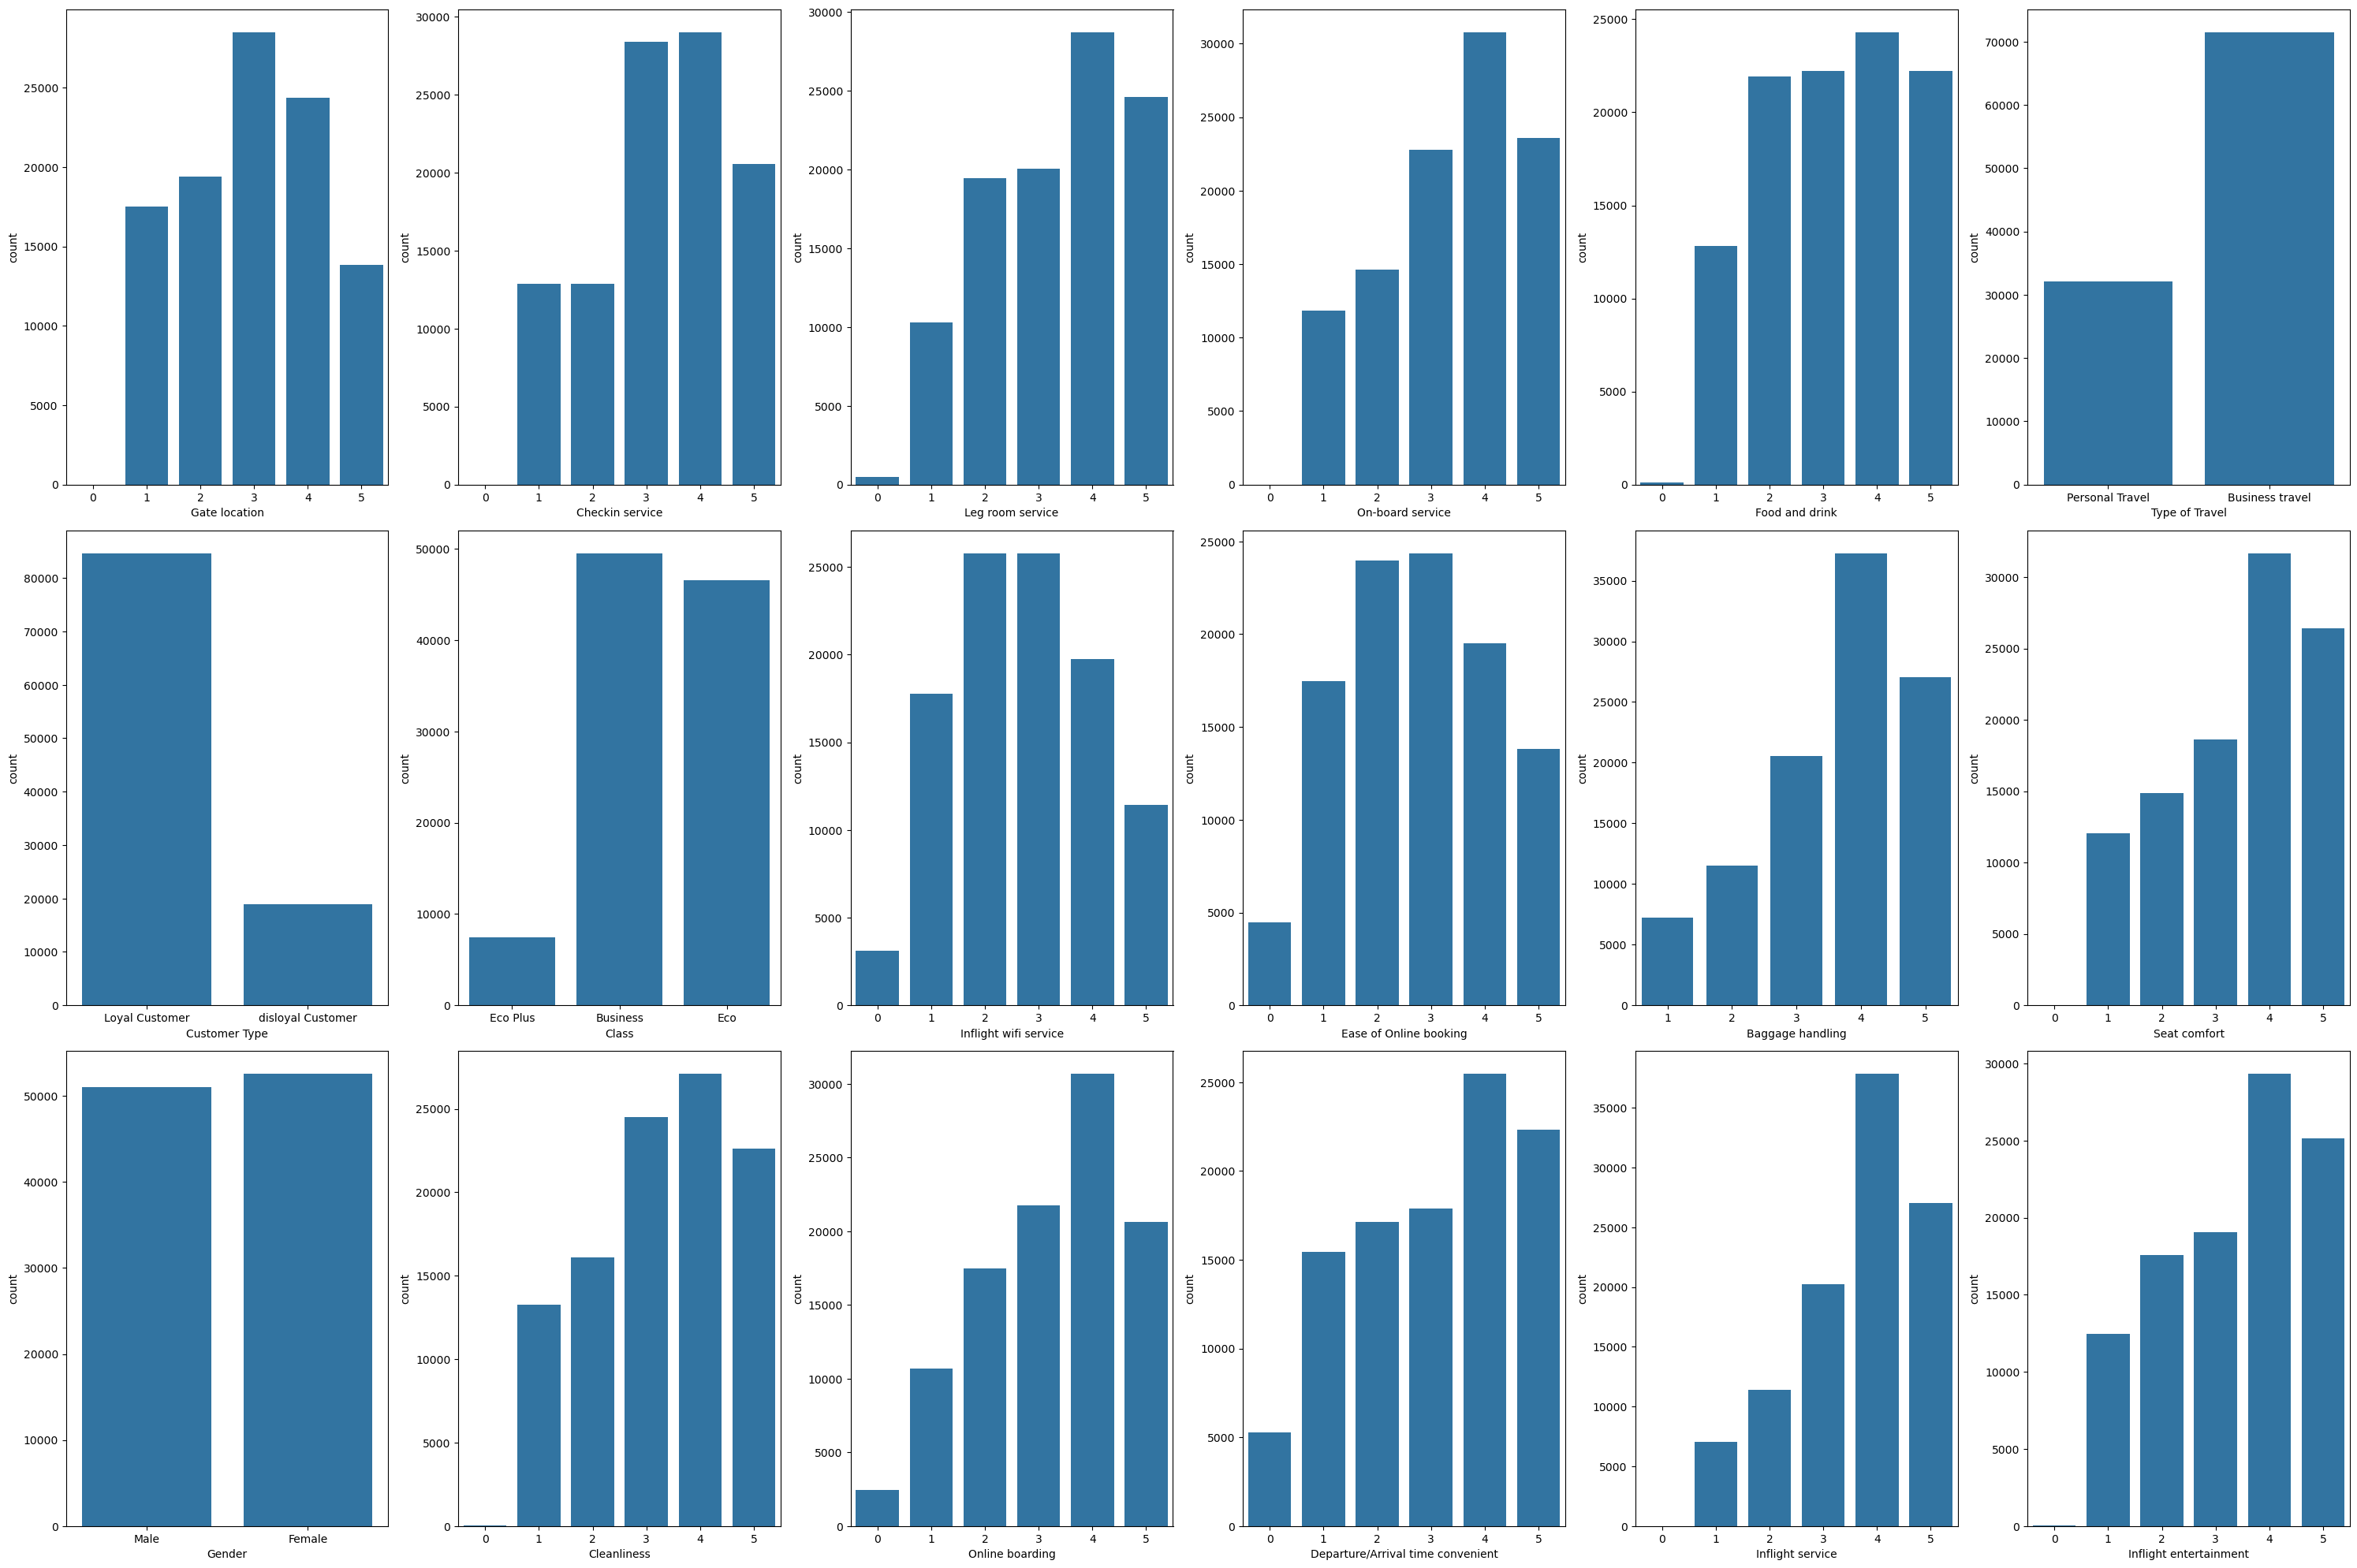

In [74]:
# Create countplot for categorical features
fig, axes = plt.subplots(3, 6, figsize=(30, 20))

# Calculate row and column indices for each subplot
for i, col in enumerate(cat):
    row = i //  6   # Integer division to get row index
    col_idx = i % 6 # Modulo to get column index
    sns.countplot(x=col, data=cat_cols, ax=axes[row, col_idx])
    axes[row, col_idx].set_xlabel(col)

plt.tight_layout()

**Explanatory Data Analysis Summary**

Almost all of the numerical features are not clearly separable by the target feature, which suggests that these features do not contain enough information to effectively predict or classify the target variable. Hence the pre-processing will only be applied to categorical data only.

### Pre-processing Data

**Encode Nominal Categorical Data**

In [79]:
from sklearn.preprocessing import OneHotEncoder

# Create categorical encoding (OHE) function
def encoding_cat_feature(data, fit=False, encoder=None):
    """
    Encodes categorical features using one-hot encoding.

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing categorical features to be encoded.

    fit : bool, default=False
        If True, fits a new OneHotEncoder to the data. Otherwise, uses the provided encoder.

    encoder : OneHotEncoder, optional
        Pre-trained OneHotEncoder to use for encoding. Ignored if `fit=True`.

    Returns
    -------
    encoder : OneHotEncoder
        The OneHotEncoder object used for transformation.

    final_df : pandas.DataFrame
        DataFrame with categorical features replaced by their one-hot encoded values.
    """
    
    # Get copy and reset_index
    data_copy = data.copy().reset_index(drop=True)
    
    # Extract the target column
    target_col = data_copy['satisfaction']
    
    # Drop the target column from the features
    data_copy = data_copy.drop('satisfaction', axis=1)

    # Select categorical features
    cat_features = data_copy.select_dtypes(include='object').columns

    # If fitting the encoder, ensure it knows all categories
    if fit:
        ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)
        
        # Fit and transform on categorical columns
        ohe.fit(data_copy[cat_features])
        encoder = ohe
        encoded_df = pd.DataFrame(ohe.transform(data_copy[cat_features]))
    else:
        # Use existing encoder to transform
        encoded_df = pd.DataFrame(encoder.transform(data_copy[cat_features]))

    # Rename columns based on the encoder output
    encoded_df.columns = encoder.get_feature_names_out(cat_features)

    # Drop the original categorical columns
    dropped_data = data_copy.drop(cat_features, axis=1)
    final_df = pd.concat([dropped_data, encoded_df], axis=1)

    return encoder, final_df


In [80]:
# Define Training Dataset
train_set = pd.concat([X, y], axis=1)

# Encode categorical data
encoder, X_encoded = encoding_cat_feature(data = train_set,
                                          fit = True)

# show train_set (sanity check)
X_encoded.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1.0,0.0,1.0,0.0,1.0
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,1.0,1.0,0.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,0.0,0.0,0.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,1.0,0.0,0.0,0.0,0.0


In [81]:
encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Loyal Customer', 'disloyal Customer'], dtype=object),
 array(['Business travel', 'Personal Travel'], dtype=object),
 array(['Business', 'Eco', 'Eco Plus'], dtype=object)]

### Modeling

**Feature Selection**

Before modeling it is important to convert the target data into numerical value.

- `Satisfed` = 1
- `Dissatisfed` = 0

In [85]:
from sklearn.preprocessing import LabelEncoder

# Create encoder for target column function
def encode_labels(y_data):
    """
    Encodes the target variable using LabelEncoder.

    Parameters
    ----------
    y_data : array-like
        Target variable containing categorical labels.

    Returns
    -------
    label_encoder : LabelEncoder
        Fitted LabelEncoder instance.

    y_encoded : numpy.ndarray
        Encoded labels as numerical values.
    """
    
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_data)
    
    return label_encoder, y_encoded

In [86]:
#Encode y train data
label_encoder, y_train_encoded = encode_labels(y)

In [87]:
print(label_encoder.classes_)

['Dissatisfied' 'Satisfied']


Assessing feature importance to select 5 features that is strongly relevant to target data using `RandomForestClassifier`, by selecting five highest scores.

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_encoded, y_train_encoded)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Display feature importances
feature_names = X_encoded.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
7,Online boarding,0.168829
2,Inflight wifi service,0.149961
20,Type of Travel_Personal Travel,0.105048
21,Class_Eco,0.074040
9,Inflight entertainment,0.055648
8,Seat comfort,0.047139
1,Flight Distance,0.041115
11,Leg room service,0.039089
4,Ease of Online booking,0.037418
19,Customer Type_disloyal Customer,0.036786


Based on above features selection, the five features that will be used in the rule-based modeling are:
- `Online boarding` 
- `Inflight wifi service`
- `Type of Travel_Personal Travel`
- `Class_Eco`
- `Inflight entertainment`

### Rule-Based Model

**Rule-based Classification Logic**

1. For ordinal values (0 to 5): 
    - `Online boarding`
    - `Inflight wifi service`
    - `Inflight entertainment`
<br>If the rating is 3 or above, the customer is considered satisfied with the service; otherwise, dissatisfied.<br><br>

2. `Type of Travel` (Personal Travel encoded 1 and 0):  1 (Personal Travel) indicates travel purposes, while 0  represents business travel.
 
3. `Class` (Eco encoded 1 and 0): If 1 (Eco class), the customer may be less satisfied due to more basic service, and 0 represents a higher class with better facilities.

4. If three or more features are satisfied, customer is considered satisfied


In [94]:
# Create a function that classify the rule based model
def classify_satisfaction_rule_based(row):
    """
    Classifies customer satisfaction based on predefined feature rules.

    Parameters
    ----------
    row : pandas.Series
        A row from the DataFrame containing relevant features for classification.

    Returns
    -------
    str
        Satisfaction label, either 'Satisfied' or 'Dissatisfied'.
    """
    
    # Rule 1: Online boarding (ordinal 0 to 5)
    if row['Online boarding'] >= 3:
        online_boarding_satisfaction = True
    else:
        online_boarding_satisfaction = False

    # Rule 2: Inflight wifi service (ordinal 0 to 5)
    if row['Inflight wifi service'] >= 3:
        inflight_wifi_satisfaction = True
    else:
        inflight_wifi_satisfaction = False

    # Rule 3: Type of Travel (1 = Personal Travel, 0 = other)
    if row['Type of Travel_Personal Travel'] == 1:
        personal_travel_satisfaction = True
    else:
        personal_travel_satisfaction = False

    # Rule 4: Class (1 = Eco, 0 = other)
    if row['Class_Eco'] == 1:
        eco_class_satisfaction = False  # Lower class might indicate dissatisfaction
    else:
        eco_class_satisfaction = True  # Higher class might indicate satisfaction

    # Rule 5: Inflight entertainment (ordinal 0 to 5)
    if row['Inflight entertainment'] >= 3:
        inflight_entertainment_satisfaction = True
    else:
        inflight_entertainment_satisfaction = False

    # Combine the rules: If most of the features are satisfied (True), classify as 'Satisfied'
    satisfied_count = sum([online_boarding_satisfaction, inflight_wifi_satisfaction, 
                          personal_travel_satisfaction, eco_class_satisfaction, 
                          inflight_entertainment_satisfaction])

    if satisfied_count >= 3:  # If 3 or more features indicate satisfaction
        return 'Satisfied'
    else:
        return 'Dissatisfied'

In [95]:
# Copy X to avoid modifying the original data
X_ruled = X_encoded.copy()

# Apply the rule-based classification function
X_ruled['satisfaction'] = X_ruled.apply(classify_satisfaction_rule_based, axis=1)

# Show applied rule
X_ruled_features = X_ruled[['Online boarding', 'Inflight wifi service', 
                    'Type of Travel_Personal Travel', 'Class_Eco', 
                    'Inflight entertainment', 'satisfaction']]

X_ruled_features.head()

,Online boarding,Inflight wifi service,Type of Travel_Personal Travel,Class_Eco,Inflight entertainment,satisfaction
0,3,3,1.0,0.0,5,Satisfied
1,3,3,0.0,0.0,1,Satisfied
2,5,2,0.0,0.0,5,Satisfied
3,2,2,0.0,0.0,2,Dissatisfied
4,5,3,0.0,0.0,3,Satisfied


##  **<font color='blue'>Task 4: Build Metrics for Simulation</font>**

### Satisfied Class Data

The datasets provide all the features that are available in Task 1 with additional column `Conversion` in year 2020 and 2021. This data respresents only `satisfied` customer which will be used on `Repurchase Rate` and `Average Order Value` business metrics. 

**Import Data**

In [100]:
satisfied_1 = read_data(path = 'convert_data_2020_q1.csv')
satisfied_2 = read_data(path = 'convert_data_2020_q2.csv')
satisfied_3 = read_data(path = 'convert_data_2020_q3.csv')
satisfied_4 = read_data(path = 'convert_data_2020_q4.csv')

satisfied_5 = read_data(path = 'convert_data_2021_q1.csv')
satisfied_6 = read_data(path = 'convert_data_2021_q2.csv')
satisfied_7 = read_data(path = 'convert_data_2021_q3.csv')
satisfied_8 = read_data(path = 'convert_data_2021_q4.csv')

Data shape : (6949, 25)
Data shape : (8859, 25)
Data shape : (7653, 25)
Data shape : (10621, 25)
Data shape : (10245, 25)
Data shape : (9776, 25)
Data shape : (14819, 25)
Data shape : (9688, 25)


In [101]:
# Concat yearly data
satisfied_2020 = pd.concat([satisfied_1,satisfied_2 ,satisfied_3 ,satisfied_4], ignore_index=True)
satisfied_2021 = pd.concat([satisfied_5 ,satisfied_6 ,satisfied_7 ,satisfied_8], ignore_index=True)

# Concat all data
satisfied_all = pd.concat([satisfied_2020,satisfied_2021], ignore_index=True)

In [102]:
# Display satisfied data 2020
print(f'Satisfied 2020 data shape: {satisfied_2020.shape}')
satisfied_2020.head()

Satisfied 2020 data shape: (34082, 25)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,conversion
0,185933,Male,Loyal Customer,54,Business travel,Business,3758,5,5,5,...,4,4,4,4,4,5,43,37.0,satisfied,Converted
1,127711,Female,disloyal Customer,20,Business travel,Eco,641,5,0,5,...,5,3,1,5,5,5,505,486.0,satisfied,Converted
2,173115,Female,disloyal Customer,50,Business travel,Business,1127,4,4,4,...,5,2,4,3,4,3,0,0.0,satisfied,Converted
3,92061,Female,Loyal Customer,36,Business travel,Business,1765,2,2,2,...,5,5,4,5,5,5,9,7.0,satisfied,Converted
4,143699,Female,Loyal Customer,39,Business travel,Business,3145,3,3,3,...,4,4,4,2,4,2,1,0.0,satisfied,Converted


In [103]:
#Check if ID is unique
print(f'Number of unique customer: {satisfied_2020['id'].nunique()}')

Number of unique customer: 31217


In [104]:
# Display satisfied data 2021
print(f'Satisfied 2021 data shape: {satisfied_2021.shape}')
satisfied_2021.head()

Satisfied 2021 data shape: (44528, 25)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,conversion
0,115972,Female,Loyal Customer,16,Business travel,Eco,491,4,5,5,...,3,4,5,4,2,4,0,0.0,satisfied,Converted
1,54759,Male,Loyal Customer,40,Business travel,Business,3578,5,5,5,...,4,4,4,3,4,5,0,0.0,satisfied,Not Converted
2,131413,Female,Loyal Customer,26,Business travel,Business,3493,3,3,3,...,5,4,5,5,5,5,0,0.0,satisfied,Converted
3,20307,Male,Loyal Customer,34,Business travel,Business,762,1,1,1,...,4,5,4,3,4,4,0,0.0,satisfied,Converted
4,135259,Female,Loyal Customer,40,Business travel,Business,575,5,5,5,...,4,4,4,5,4,5,0,0.0,satisfied,Converted


In [105]:
#Check if ID is unique
print(f'Number of unique customer: {satisfied_2021['id'].nunique()}')

Number of unique customer: 39719


In [106]:
#Check if ID is unique
print(f'Number of unique customer: {satisfied_all['id'].nunique()}')

Number of unique customer: 65565


#### Business Metrics Assumption

**Repurchase Rate**

To calculate `Repurchase rate`, Number of Unique Customer will be used to determine how many percentage the satisfied customers are making another purchase within the time period. 

calculate the `Average Purchases per Customer` using the formula:

$$
\text{Average Purchases per Customer} = \frac{\text{Total Rows}}{\text{Unique Customers}}
$$

To estimate the `Repurchase Rate`, the formula are follow:

$$
\text{Repurchase Rate Estimate} = \frac{\text{Average Purchases per Customer} - 1}{\text{Average Purchases per Customer}} \times 100\%
$$

In [110]:
# Create a function to calculate repurchase rate
def get_repurchase_rate(data):
    """
    Calculates total purchases, unique customers, average purchases per customer, 
    and estimated repurchase rate.

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing purchase data.

    Returns
    -------
    dict
        Dictionary with the following metrics:
        - 'total_purchases': Total number of purchases.
        - 'unique_customers': Number of unique customers.
        - 'avg_purchases_per_customer': Average purchases per customer.
        - 'repurchase_rate': Estimated percentage of customers who made multiple purchases.
    """
    
    total_purchases = len(data)
    
    unique_customers = data['id'].nunique()
    
    avg_purchases_per_customer = total_purchases / unique_customers if unique_customers > 0 else 0
        
    repurchase_rate = ((avg_purchases_per_customer - 1) / avg_purchases_per_customer) * 100 if avg_purchases_per_customer > 1 else 0
    repurchase_rate = round(repurchase_rate, 2)
    
    return {
        "Total Purchases": total_purchases,
        "Unique Customers": unique_customers,
        "Avg Purchases per Customer (%)": round(avg_purchases_per_customer, 2),
        "Repurchase Rate (%)": repurchase_rate
    }

In [111]:
# Display repurchase rate 2020
repurchase_rate_2020 = get_repurchase_rate(satisfied_2020)
print('Repurchase Rate 2020:')
repurchase_rate_2020

Repurchase Rate 2020:


{'Total Purchases': 34082,
 'Unique Customers': 31217,
 'Avg Purchases per Customer (%)': 1.09,
 'Repurchase Rate (%)': 8.41}

In [112]:
# Display repurchase rate 2021
repurchase_rate_2021 = get_repurchase_rate(satisfied_2021)
print('Repurchase Rate 2021')
repurchase_rate_2021

Repurchase Rate 2021


{'Total Purchases': 44528,
 'Unique Customers': 39719,
 'Avg Purchases per Customer (%)': 1.12,
 'Repurchase Rate (%)': 10.8}

In [113]:
# Average yearly Repurchase Rate
avg_repurchase_rate = (repurchase_rate_2021['Repurchase Rate (%)'] + repurchase_rate_2020['Repurchase Rate (%)']) / 2
print(f"Estimated Repurchase Rate: {avg_repurchase_rate:.2f}%")

Estimated Repurchase Rate: 9.61%


**Average Order Value**

In [115]:
# Check class flight value
satisfaction_data['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

To determine `Revenue`, two variables that is used to assume are `Class` for ticket base fare and `Flight Distance`.
Base price and coefficient for the variables are:

**1. Class Coefficients:**
- Eco:  `$500`
- Eco Plus: `$1000`
- Business:  `$5000`

**2. Flight Distance Coefficients:**
- Short flights (0 - 1499 miles): 0.8
- Medium flights (1500 - 2999 miles): 1.0
- Long flights (>= 3000 miles): 1.5.


To calculate the `Average Order Value (AOV)` using the estimated revenue, here is the formula:
$$
AOV = \frac{\text{Total Revenue}}{\text{Total Orders}}
$$

##


In [117]:
# Create a function to get coefficient distance
def get_distance_coefficient(distance, flight_class):
    """
    Determines the distance coefficient based on flight distance.

    Parameters
    ----------
    distance : float
        The flight distance in kilometers.
    
    flight_class : str
        The class of the flight (not used in the current logic but included for potential future use).

    Returns
    -------
    float
        The distance coefficient:
        - 0.8 for distances < 1500 km
        - 1.0 for distances between 1500 and 3000 km
        - 1.5 for distances >= 3000 km
    """
    
    if distance < 1500:
        return 0.8 
    elif 1500 <= distance < 3000:
        return 1.0 
    else:
        return 1.5

# Create a function to calculate estimated revenue   
def get_revenue(row):
    """
    Calculates revenue based on flight class and distance.

    Parameters
    ----------
    row : pandas.Series
        A row from the DataFrame containing 'Class' and 'Flight Distance'.

    Returns
    -------
    float
        The calculated revenue based on the base price and distance coefficient.
    """
    base_price = base_prices.get(row['Class'])
    distance_coefficient = get_distance_coefficient(row['Flight Distance'], row['Class'])
    revenue = base_price * distance_coefficient
    return revenue

In [118]:
# Define base prices for each class
base_prices = {
    'Eco': 500,
    'Eco Plus': 1000,
    'Business': 5000
}

In [119]:
# Apply the function to the DataFrame
satisfied_2020['Estimated Revenue'] = satisfied_2020.apply(get_revenue, axis=1)
satisfied_2021['Estimated Revenue'] = satisfied_2021.apply(get_revenue, axis=1)
satisfied_all['Estimated Revenue'] = satisfied_all.apply(get_revenue, axis=1)

satisfied_all[['Class', 'Flight Distance', 'Estimated Revenue']]

,Class,Flight Distance,Estimated Revenue
0,Business,3758,7500.0
1,Eco,641,400.0
2,Business,1127,4000.0
3,Business,1765,5000.0
4,Business,3145,7500.0
...,...,...,...
78605,Business,528,4000.0
78606,Business,950,4000.0
78607,Eco,216,400.0
78608,Business,2629,5000.0


In [120]:
#Create a function to calculate AOV
def get_aov(data):
    """
    Calculates total revenue, total orders, and Average Order Value (AOV).

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing order data, including revenue values.

    Returns
    -------
    dict
        Dictionary containing:
        - 'total_revenue': Sum of all revenue values.
        - 'total_orders': Number of orders.
        - 'AOV': Average Order Value (total revenue divided by total orders).
    """
    
    total_revenue = data['Estimated Revenue'].sum()
    
    total_orders = len(data)
    
    aov = total_revenue / total_orders if total_orders > 0 else 0
    aov = round(aov,2)
    
    return {
        "Total Revenue ($)": total_revenue,
        "Total Orders": total_orders,
        "AOV ($)": aov
    }

In [121]:
# Calculate AOV for 2020
aov_2020 = get_aov(satisfied_2020)
print('Average Order Value 2020')
aov_2020

Average Order Value 2020


{'Total Revenue ($)': 135949650.0, 'Total Orders': 34082, 'AOV ($)': 3988.9}

In [122]:
# Calculate AOV for 2021
aov_2021 = get_aov(satisfied_2021)
print('Average Order Value 2021')
aov_2021

Average Order Value 2021


{'Total Revenue ($)': 177329600.0, 'Total Orders': 44528, 'AOV ($)': 3982.43}

In [123]:
# Average yearly AOV
avg_aov = (aov_2021['AOV ($)'] + aov_2020['AOV ($)']) / 2
print(f"Estimated Repurchase Rate: ${avg_aov:.2f}")

Estimated Repurchase Rate: $3985.66


**Cost of Repurchase Customer**

There are several methods to assume Customer Retention Cost:
- `AOV percentage`:
  Assume that a repurchase customer costs a percentage of the Average Order Value (AOV).
  
- `Fixed Cost per Repurchase`:
  Assume a fixed cost per returning customer based on industry benchmarks.

  
- `Discount-Based Approach`:
  If repurchase customers get discounts, assume that as a cost.

  
- `Churn-Based Assumption`:
  If only X% of customers repurchase, distribute the total retention cost across them.

<br><br>
To simplify the assumption, the first approach will be used, with retention cost at `0.5% of AOV`.

$$
\text{Retention Cost per Repurchase} = \text{AOV} \times 0.005
$$

In [126]:
#Create function to calculate repurchase cost
def get_repurchase_cost(aov, rep_coef):
    """
    Calculates the assumed retention cost per repurchase.

    Parameters
    ----------
    aov : float
        The Average Order Value (AOV).

    rep_coef : float
        The retention cost coefficient (percentage of AOV considered as repurchase cost).

    Returns
    -------
    float
        The calculated retention cost per repurchase.
    """
    
    cost_repurchase = aov * rep_coef
    
    return cost_repurchase


In [127]:
aov = aov_2020['AOV ($)']
rep_coef = 0.005

rep_cost_2020 = get_repurchase_cost(aov = aov,
                                     rep_coef = rep_coef)

print(f"Assumed Cost per Repurchase 2020: ${rep_cost_2020:.2f}")


Assumed Cost per Repurchase 2020: $19.94


In [128]:
aov = aov_2021['AOV ($)']
rep_coef = 0.005

rep_cost_2021 = get_repurchase_cost(aov = aov,
                                     rep_coef = rep_coef)

print(f"Assumed Cost per Repurchase 2021: ${rep_cost_2021:.2f}")


Assumed Cost per Repurchase 2021: $19.91


In [129]:
# Average yearly retention cost
avg_cost_per_repurchase = (rep_cost_2021 + rep_cost_2020) / 2
print(f"Estimated Cost of Repurchase: ${avg_cost_per_repurchase:.2f}")

Estimated Cost of Repurchase: $19.93


#### Dissatisfied Class Data

The datasets provide all the features that are available in Task 1 with additional column `Churn` in year 2020 and 2021. 
This data respresents only `Dissatisfied` customer which will be used on the business metrics. 

**Import Data**

In [133]:
dissatisfied_1 = read_data(path = 'churn_data_2020_q1.csv')
dissatisfied_2 = read_data(path = 'churn_data_2020_q2.csv')
dissatisfied_3 = read_data(path = 'churn_data_2020_q3.csv')
dissatisfied_4 = read_data(path = 'churn_data_2020_q4.csv')

dissatisfied_5 = read_data(path = 'churn_data_2021_q1.csv')  
dissatisfied_6 = read_data(path = 'churn_data_2021_q2.csv')
dissatisfied_7 = read_data(path = 'churn_data_2021_q3.csv')
dissatisfied_8 = read_data(path = 'churn_data_2021_q4.csv')

Data shape : (22809, 25)
Data shape : (29364, 25)
Data shape : (32625, 25)
Data shape : (23216, 25)
Data shape : (18312, 25)
Data shape : (26187, 25)
Data shape : (28635, 25)
Data shape : (35583, 25)


In [134]:
# Concat yearly data
dissatisfied_2020 = pd.concat([dissatisfied_1,dissatisfied_2 ,dissatisfied_3 ,dissatisfied_4], ignore_index=True)
dissatisfied_2021 = pd.concat([dissatisfied_5 ,dissatisfied_6 ,dissatisfied_7 ,dissatisfied_8], ignore_index=True)

# Concat all data
dissatisfied_all = pd.concat([dissatisfied_2020,dissatisfied_2021], ignore_index=True)

In [135]:
# Display satisfied data 2020
print(f'Dissatisfied 2020 data shape: {dissatisfied_2020.shape}')
dissatisfied_2020.head()

Dissatisfied 2020 data shape: (108014, 25)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,churn
0,64556,Male,Loyal Customer,59,Personal Travel,Eco,710,1,5,1,...,3,4,5,4,4,1,26,12.0,dissatisfied,Churn
1,100379,Female,Loyal Customer,61,Personal Travel,Eco,310,2,4,2,...,4,2,4,4,4,3,85,87.0,dissatisfied,Churn
2,102044,Female,Loyal Customer,46,Personal Travel,Eco,1041,1,5,1,...,5,1,5,5,5,4,0,20.0,dissatisfied,Churn
3,153566,Male,disloyal Customer,26,Business travel,Business,1587,3,3,3,...,4,5,4,5,4,2,0,6.0,dissatisfied,Churn
4,72989,Female,disloyal Customer,34,Business travel,Eco,253,1,0,1,...,4,3,4,2,2,2,0,0.0,dissatisfied,Churn


In [136]:
# Display satisfied data 2020
print(f'Dissatisfied 2021 data shape: {dissatisfied_2021.shape}')
dissatisfied_2021.head()

Dissatisfied 2021 data shape: (108717, 25)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,churn
0,101761,Female,disloyal Customer,23,Business travel,Eco,859,2,2,2,...,5,4,4,3,5,5,17,21.0,dissatisfied,Churn
1,110879,Male,Loyal Customer,55,Personal Travel,Eco,1111,3,5,3,...,4,4,4,4,5,1,8,4.0,dissatisfied,Churn
2,32282,Male,disloyal Customer,30,Business travel,Eco,448,2,2,2,...,3,3,3,1,4,3,0,0.0,dissatisfied,Churn
3,52252,Female,Loyal Customer,28,Personal Travel,Eco,129,1,3,1,...,3,1,3,1,4,3,0,18.0,dissatisfied,Churn
4,40931,Male,Loyal Customer,58,Personal Travel,Eco,472,2,5,2,...,1,1,2,2,1,3,0,0.0,dissatisfied,Churn


In [137]:
#Check if ID is unique
print(f'Number of unique customer: {dissatisfied_all.id.nunique()}')

Number of unique customer: 131525


#### Business Metrics Assumption

**Churn Rate**

The churn rate measures the percentage of customers who stop using a service over a period of time. It is measured by number of customers who churned divided by total unique customers.

$$
\text{Churn Rate} = \frac{\text{Number of Churned Customers}}{\text{Total Unique Customers}} \times 100\%
$$

In [141]:
dissatisfied_2020['churn'].unique()

array(['Churn', 'Not Churn'], dtype=object)

In [142]:
# Create a function to calculate churn rate
def get_churn_rate(data):
    """
    Calculates the churn rate based on unique customer activity.
    
    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing customer IDs and churn status.
    
    Returns
    -------
    dict
        Dictionary containing:
        - 'churned_customers': Number of customers who have churned.
        - 'non_churned_customers': Number of active customers.
        - 'churn_rate': Proportion of churned customers to total customers.
    """
    # Count unique customers
    total_unique_customers = data['id'].nunique()
    
    # Count unique churned customers
    churned_customers = data[data['churn'] == 'Churn']['id'].nunique()
    
    # Calculate churn rate
    churn_rate = (churned_customers / total_unique_customers) * 100 if total_unique_customers > 0 else 0
    churn_rate = round(churn_rate, 2)
    
    return {
        "Churned Customers": churned_customers,
        "Total Unique Customer": total_unique_customers,
        "Churn Rate (%)": churn_rate
    }

In [143]:
churn_2020 = get_churn_rate(data = dissatisfied_2020)
print('Total Churn 2020')
churn_2020

Total Churn 2020


{'Churned Customers': 72237,
 'Total Unique Customer': 85581,
 'Churn Rate (%)': 84.41}

In [144]:
churn_2021 = get_churn_rate(data = dissatisfied_2021)
print('Total Churn 2021')
churn_2021

Total Churn 2021


{'Churned Customers': 72095,
 'Total Unique Customer': 85564,
 'Churn Rate (%)': 84.26}

In [145]:
# Average yearly churn rate
avg_churn_rate = (churn_2021['Churn Rate (%)'] + churn_2020['Churn Rate (%)']) / 2
print(f"Estimated Cost of Repurchase: {avg_churn_rate:.2f}%")

Estimated Cost of Repurchase: 84.34%


**Cost Acquisition Cost**

The `Customer Acquisition Cost (CAC)` estimates how much it costs to acquire a new customer. Generally, it calculates the total marketing cost to gain new customers with formula as follow:

$$
CAC = \frac{\text{Total Marketing Cost}}{\text{Number of New Customers}}
$$

<br>With no marketing cost information in the data, the certain percentage of total revenue as a marketing cost. So, total marketing cost formula is as below:

$$
\text{Total Revenue} = \text{AOV} \times \text{Total Transaction}
$$
<br>
$$
\text{Estimated Marketing Cost} = \text{Total Revenue} \times \text{Marketing Spend \%}
$$


In defining `Customer Acquisition Cost (CAC)` the AOV is derived from dissatisfied customers data rather than the satisfied ones. Because, knowing their spending behavior before churning is more relevant to understand how much value that can be extracted from them. Hence it is better to use so it will not overestimate profitability.

Also, in this case, the marketing coefficient is `1% of the Total Revenue`.

In [149]:
# Apply AOV to dissatisfied customer1 year 2020
dis_2020 = dissatisfied_2020.copy()
dis_2020['Estimated Revenue'] = dis_2020.apply(get_revenue, axis=1)

aov_2020_dis = get_aov(dis_2020)
print('Average Order Value 2020')
aov_2020_dis

Average Order Value 2020


{'Total Revenue ($)': 168211350.0, 'Total Orders': 108014, 'AOV ($)': 1557.31}

In [150]:
# # Apply AOV to dissatisfied customers year 2021
dis_2021 = dissatisfied_2021.copy()
dis_2021['Estimated Revenue'] = dis_2021.apply(get_revenue, axis=1)

aov_2021_dis = get_aov(dis_2021)
print('Average Order Value 2021')
aov_2021_dis

Average Order Value 2021


{'Total Revenue ($)': 170581150.0, 'Total Orders': 108717, 'AOV ($)': 1569.04}

In [151]:
# Create Customers Acquisition Cost function
def get_cac(data, aov, cac_coef):
    """
    Estimates Customer Acquisition Cost (CAC) using AOV and marketing spend percentage.

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing transaction data.

    aov : float
        Average Order Value (AOV).

    cac_coef : float
        Assumed percentage of revenue allocated to customer acquisition (e.g., 0.1 for 10%).

    Returns
    -------
    float
        Estimated Customer Acquisition Cost (CAC).
    """
    
    # Calculate the number of unique new customers
    new_customers = data['id'].nunique()
    
    # Estimate total revenue
    total_revenue = aov * len(data)
    
    # Estimate marketing cost
    estimated_marketing_cost = total_revenue * cac_coef
    
    # Calculate CAC
    cac = estimated_marketing_cost / new_customers if new_customers > 0 else 0
    cac = round(cac, 2)
    
    return cac


In [152]:
#Diplay Customer Acquisition Cost for 2020
marketing_percentage = 0.01

cac_2020  = get_cac(data = dissatisfied_2020,
                    aov = aov_2020_dis['AOV ($)'],
                    cac_coef = marketing_percentage)

print(f"Assumed Customer Acquisiton Cost 2020: ${cac_2020:.2f}")

Assumed Customer Acquisiton Cost 2020: $19.66


In [153]:
#Diplay Customer Acquisition Cost for 2021

cac_2021  = get_cac(data = dissatisfied_2021,
                    aov = aov_2021_dis['AOV ($)'],
                    cac_coef = marketing_percentage)

print(f"Assumed Customer Acquisiton Cost 2021: ${cac_2021:.2f}")

Assumed Customer Acquisiton Cost 2021: $19.94


In [154]:
#Diplay average Customer Acquisition Cost

avg_cac = (cac_2020 + cac_2021) / 2

print(f"Assumed Customer Acquisition Cost: ${avg_cac:.2f}")

Assumed Customer Acquisition Cost: $19.80


**Simulation Metrics**

| Status    | Metrics|   |
| -------- | ------- |-------|
| Satisfied | Repurchase Rate<br> *Percentage of aviation customer who book again*   | 9.61% |
| Satisfied | Average Order Value (AOV)<br> *Percentage of aviation customer who book again*   | \$3985.66 |
| Satisfied | Cost of Repurchase Customer<br> *Percentage of aviation customer who book again*   | \$19.93 |
| Dissatisfied | Churn Rate<br> *Percentage of aviation customer who book again*   | 84.34% |
| Dissatisfied | Customer Acquisition Cost<br> *Percentage of aviation customer who book again*   | \$19.80 |

**Build Metrics for Simulation Summary**

`Repurchase Rate`<br>
The repurchase rate within a year (where cross year is not considered) in 2020 and 2021 is somewhere between 
`8.41%` to `10.80%`, while within both year the total rate would be around 16% with 1.2 average purchase per customer. Meaning there are more likely cross-year repurchase activity from the customers. However, it is safer to use the average of both year, in which lies at `9.61% yearly repurchase rate`.

`Average Order Value Summary`<br>
The AOV within a year  in 2020 and 2021 are pretty close to each other with `$3988.90` and `$3982.43`.
The average of both year is `$3985.66 yearly AOV`.

`Cost of Repurchase`<br>
The repurchase cost, assuming 0.5% of the AOV, averaging from 2020 and 2021 is at `$19.93`.

`Churn Rate`<br>
The Churn Rate betweeeen year 2020 and 2021 are similar with `84.41%` and `84.26%`.
The average for both churn rate is `84.34% Churn Rate` of dissatisfid customers.

`Customer Acquisition Cost`<br>
With the average AOV of $1563 for dissatisfied customer in 2020 to 2021, along with 1% marketing cost, the `Customer Acquisition Cost` will be `$19.79`. 

##  **<font color='blue'>Task 5: Simulation</font>**

Based on `business metrics` defined in previous task, there are several value to be added to the simulation:

`Expected Revenue from Repurchase Customers`
<br>
$
E[revenue] = n_{satisfied\_cust} \times repurchase\_rate \times AOV
$
<br><br>
`Expected Cost for Repurchase Customers`
<br>
$
E[cost\_repurchase] = n_{satisfied\_cust} \times cost\_repurchase
$
<br><br>
`Expected Cost to Acquire Customers`
<br>
$
E[cost\_acquiring] = n_{dissatisfied\_cust} \times churn\_rate \times CAC
$
<br><br>
`Net Profit Calculation`
<br>
$
Net\_profit = E[revenue] - E[cost\_repurchase] - E[cost\_acquiring]
$
<br>

#### Rule-Based Revenue and Cost Simulation

Using `data_simulation.csv` dataset, the estimated revenue and cost simulation will be applied using `rule-based model` defined from Task 3.

**Load Data**

In [162]:
#Import Data
simulation_data = read_data(path = 'data_simulation.csv')

Data shape : (25893, 23)


In [163]:
simulation_data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,3,5,5,5,5,2,5,5,50,44.0
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,5,4,4,4,4,3,4,5,0,0.0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,2,4,1,3,2,2,2,0,0.0
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,4,1,1,1,1,3,1,4,0,6.0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,2,4,2,4,0,20.0


**Pre-process Data**

In [165]:
X_val = simulation_data.copy()

# Encode categorical data
cat_features = list(cat_cols)

encoder, X_val = encoding_cat_feature(data = train_set,
                                      fit = False,
                                     encoder = encoder)

# show train_set (shanity check)
X_val.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,1.0,0.0,1.0,0.0,1.0
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,1.0,1.0,0.0,0.0,0.0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,0.0,0.0,0.0,0.0,0.0
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,1.0,0.0,0.0,0.0,0.0


**Apply Rule-Based Model**

In [167]:
# Copy X to avoid modifying the original data
X_rb = X_val.copy()

# Apply the rule-based classification function
X_rb['satisfaction'] = X_rb.apply(classify_satisfaction_rule_based, axis=1)

# Show applied rule
X_rb_features = X_ruled[['Online boarding', 'Inflight wifi service', 
                    'Type of Travel_Personal Travel', 'Class_Eco', 
                    'Inflight entertainment', 'satisfaction']]

X_ruled_features.head()

,Online boarding,Inflight wifi service,Type of Travel_Personal Travel,Class_Eco,Inflight entertainment,satisfaction
0,3,3,1.0,0.0,5,Satisfied
1,3,3,0.0,0.0,1,Satisfied
2,5,2,0.0,0.0,5,Satisfied
3,2,2,0.0,0.0,2,Dissatisfied
4,5,3,0.0,0.0,3,Satisfied


**Calculate the Simulation**

In [169]:
# Create Revenue and Cost Simulation calculation funtion 
def calculate_financial_metrics(data, repurchase_rate, aov, cost_repurchase, churn_rate, cac):
    """
    Calculates key financial metrics, including expected revenue, repurchase cost, acquisition cost, and net profit.

    Parameters
    ----------
    data : pandas.DataFrame
        DataFrame containing order data.

    repurchase_rate : float
        The proportion of customers expected to make a repeat purchase.

    aov : float
        Average Order Value (AOV).

    cost_repurchase : float
        Cost incurred per repurchase.

    churn_rate : float
        The proportion of customers who stop purchasing.

    cac : float
        Customer Acquisition Cost (CAC).

    Returns
    -------
    dict
        Dictionary containing:
        - 'expected_revenue': Total expected revenue based on AOV and customer retention.
        - 'expected_repurchase_cost': Total cost of repurchases.
        - 'expected_acquisition_cost': Total acquisition cost for new customers.
        - 'net_profit': Expected revenue minus repurchase and acquisition costs.
    """
  
    # Count satisfied and dissatisfied customers
    n_satisfied_cust = data[data['satisfaction'] == 'Satisfied'].shape[0]
    n_dissatisfied_cust = data[data['satisfaction'] == 'Dissatisfied'].shape[0]
    
    # Calculate financial metrics
    expected_revenue = n_satisfied_cust * repurchase_rate * aov
    expected_revenue = round(expected_revenue, 2)
    
    expected_cost_repurchase = n_satisfied_cust * cost_repurchase
    expected_cost_repurchase = round(expected_cost_repurchase, 2)
   
    expected_cost_acquiring = n_dissatisfied_cust * churn_rate * cac
    expected_cost_acquiring = round(expected_cost_acquiring, 2)
    
    net_profit = expected_revenue - expected_cost_repurchase - expected_cost_acquiring
    net_profit = round(net_profit, 2)
    
    return {
        "Total Satisfied Customers": n_satisfied_cust,
        "Total Dissatisfied Customers": n_dissatisfied_cust,
        "Expected Revenue ($)": expected_revenue,
        "Expected Cost Repurchase ($)": expected_cost_repurchase,
        "Expected Cost Acquiring ($)": expected_cost_acquiring,
        "Net Profit ($)": net_profit
    }

In [170]:
# Define the metrics
repurchase_rate = 9.61/100
aov = 3985.66
cost_repurchase = 19.93
churn_rate = 84.34/100
cac = 19.80

In [171]:
# Calculate the Rule-Based simulation
X_rb_simulation = calculate_financial_metrics (data = X_rb,
                                              repurchase_rate = repurchase_rate,
                                              aov = aov,
                                              cost_repurchase = cost_repurchase,
                                              churn_rate = churn_rate,
                                              cac = cac)

X_rb_simulation

{'Total Satisfied Customers': 69065,
 'Total Dissatisfied Customers': 34529,
 'Expected Revenue ($)': 26453409.32,
 'Expected Cost Repurchase ($)': 1376465.45,
 'Expected Cost Acquiring ($)': 576610.82,
 'Net Profit ($)': 24500333.05}

#### Machine Learning Revenue and Cost Simulation

The dataset used for training the interpretable machine learning model will be `satisfaction_df.csv`. The `data_simulation.csv` data set then will be used to predict satisfactory customer classification which later revenue and cost simulation metrics will be applied to.

For this case, the machine learning model to use is `Random Forest Classifier`.
The workflow of this Machine Learning process are:


1. Split training data <br>
Since `simulation_data.csv` has no satisfaction label, split the training data into a smaller training set and a validation set is necessary for ML developmnet.

2. Train the model <br>
Train the `Random Forest` model on the training set.

3. Evaluate training model <br>
Evaluate the model’s performance on training validation set using performance metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

4. Predicts on simulation dataset <br>
Use the trained model to generate predictions on simulation data.

5. Simulate the simulation dataset <br>
Once satisfaction labels of the simulation data is available, calculate the result.

**Machine Learning Modeling**

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

Split training data

In [178]:
X_train, X_train_val, y_train, y_train_val = train_test_split (X_encoded, y_train_encoded, 
                                                               test_size = 0.2, 
                                                               random_state = 123)

Train the model

In [180]:
# Random Forest Model
rf = RandomForestClassifier(random_state = 42)

# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the training model

In [182]:
#Create evaluation performance model function
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, pos_label= 1)}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label= 1)}")
    print(f"F1-Score: {f1_score(y_true, y_pred, pos_label= 1)}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred == 1)}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred, labels=[1, 0]))


In [183]:
# Predictions to train data
y_trn_pred = rf.predict(X_train)

In [184]:
# Evaluate Train prediction
evaluate_model(y_train, y_trn_pred, "Random Forest")

Evaluation for Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0
Confusion Matrix:
 [[35957     0]
 [    0 46918]]


Using the model, the performance reach 100% accuracy for all of the scoring. This seems good, but this also mean a potential over-fitting scenario. Let's test with the validation data and look if the score has a relatively large gap.

In [186]:
# Predict on validation set
y_trv_pred = rf.predict(X_train_val)

In [187]:
evaluate_model(y_train_val, y_trv_pred, "Random Forest")

Evaluation for Random Forest:
Accuracy: 0.9610019788599836
Precision: 0.9688653136531366
Recall: 0.9398210290827741
F1-Score: 0.9541221894163071
ROC-AUC: 0.958449439747262
Confusion Matrix:
 [[ 8402   538]
 [  270 11509]]


Comparing on both training and training validation result shows that the prediction tends to have high accuracy, since even the training validation result gives pretty 95% overall score. This could mean that the model is a good fit. 

Predicts on validation dataset

In [190]:
# Predict on Validation dataset
y_val_pred = rf.predict(X_val)

In [191]:
# Make copy
X_rf = X_val.copy()

# Insert prediction into the dataset
X_rf['satisfaction'] = y_val_pred

# Decode the target column
X_rf['satisfaction'] = X_rf['satisfaction'].map({1: 'Satisfied', 0: 'Dissatisfied'})

In [192]:
X_rf.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,1.0,0.0,1.0,0.0,1.0,Dissatisfied
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,1.0,1.0,0.0,0.0,0.0,Dissatisfied
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,0.0,0.0,0.0,0.0,0.0,Satisfied
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,0.0,0.0,0.0,0.0,0.0,Dissatisfied
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,1.0,0.0,0.0,0.0,0.0,Satisfied


**Simulate the Simulation Dataset**

In [194]:
# Calculate the Machine Learning simulation
X_rf_simulation = calculate_financial_metrics (data = X_rf,
                                              repurchase_rate = repurchase_rate,
                                              aov = aov,
                                              cost_repurchase = cost_repurchase,
                                              churn_rate = churn_rate,
                                              cac = cac)

X_rf_simulation

{'Total Satisfied Customers': 44629,
 'Total Dissatisfied Customers': 58965,
 'Expected Revenue ($)': 17093885.54,
 'Expected Cost Repurchase ($)': 889455.97,
 'Expected Cost Acquiring ($)': 984675.4,
 'Net Profit ($)': 15219754.17}

**Simulation Summary** <br>

Although the rule-based was came with feature importance, the lack of variable and/or the base of reasoning used in the model probably is the reason the results are highly differentiate from one and another. However, we can compare it to the test data to make sure that the Rule-Based model is the one that is not accurate enough.

##  **<font color='blue'>Task 6: Evaluate the Simulation</font>**

After simulating the revenue and cost, the ML model will be evaluated toward the `test.csv`  The result will be compared to the actual result.

In [198]:
#Import Data
test_data = read_data(path = 'test.csv')

Data shape : (25976, 24)


In [199]:
# set customerID as index
test_data.set_index('id', inplace=True)

In [200]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


**Predict Test Data**

In [202]:
# Split input and output
X_test, y_test = split_input_output(data = test_data,
                          target_column = "satisfaction")

In [203]:
# Define Training Dataset
test_set = pd.concat([X_test, y_test], axis=1)

# Encode categorical data
cat_features = list(cat_cols)

encoder, X_test = encoding_cat_feature(data = test_set,
                                      fit = False,
                                     encoder = encoder)

# show train_set (sanity check)
X_test.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,2,5,5,50,44.0,0.0,0.0,0.0,1.0,0.0
1,36,2863,1,1,3,1,5,4,5,4,...,3,4,5,0,0.0,0.0,0.0,0.0,0.0,0.0
2,20,192,2,0,2,4,2,2,2,2,...,2,2,2,0,0.0,1.0,1.0,0.0,1.0,0.0
3,44,3377,0,0,0,2,3,4,4,1,...,3,1,4,0,6.0,1.0,0.0,0.0,0.0,0.0
4,49,1182,2,3,4,3,4,1,2,2,...,4,2,4,0,20.0,0.0,0.0,0.0,1.0,0.0


In [204]:
#Encode y train data
test_label_encoder, y_test_encoded = encode_labels(y_test)

In [205]:
print(test_label_encoder.classes_)

['neutral or dissatisfied' 'satisfied']


In [206]:
# Predict on Validation dataset
y_test_pred = rf.predict(X_test)

**Evaluate Prediction Test**

In [208]:
evaluate_model(y_test_encoded, y_test_pred, "Random Forest")

Evaluation for Random Forest:
Accuracy: 0.9621188789651987
Precision: 0.9715759934823934
Recall: 0.9412435324037534
F1-Score: 0.9561692650334076
ROC-AUC: 0.9598484182295992
Confusion Matrix:
 [[10733   670]
 [  314 14259]]


**Compare the Simulation**

In [210]:
# Make copy
X_test_rf = X_test.copy()

# Insert prediction into the dataset
X_test_rf['satisfaction'] = y_test_pred

# Decode the target column
X_test_rf['satisfaction'] = X_test_rf['satisfaction'].map({1: 'Satisfied', 0: 'Dissatisfied'})

In [211]:
# Calculate the predicted test data Machine Learning simulation
X_test_simulated = calculate_financial_metrics (data = X_test_rf,
                                              repurchase_rate = repurchase_rate,
                                              aov = aov,
                                              cost_repurchase = cost_repurchase,
                                              churn_rate = churn_rate,
                                              cac = cac)

X_test_simulated

{'Total Satisfied Customers': 11047,
 'Total Dissatisfied Customers': 14929,
 'Expected Revenue ($)': 4231243.22,
 'Expected Cost Repurchase ($)': 220166.71,
 'Expected Cost Acquiring ($)': 249304.15,
 'Net Profit ($)': 3761772.36}

In [212]:
# Make copy
test_simulated = test_data.copy()

# Map the target column
test_simulated['satisfaction'] = test_simulated['satisfaction'].map({'satisfied': 'Satisfied', 'neutral or dissatisfied': 'Dissatisfied'})

In [213]:
# Calculate the Machine Learning simulation
test_data_simulated = calculate_financial_metrics (data = test_simulated,
                                              repurchase_rate = repurchase_rate,
                                              aov = aov,
                                              cost_repurchase = cost_repurchase,
                                              churn_rate = churn_rate,
                                              cac = cac)

test_data_simulated

{'Total Satisfied Customers': 11403,
 'Total Dissatisfied Customers': 14573,
 'Expected Revenue ($)': 4367599.02,
 'Expected Cost Repurchase ($)': 227261.79,
 'Expected Cost Acquiring ($)': 243359.19,
 'Net Profit ($)': 3896978.04}

In [214]:
X_rb_test = X_test.copy()

# Apply the rule-based classification function
X_rb_test['satisfaction'] = X_rb_test.apply(classify_satisfaction_rule_based, axis=1)

test_rb_simulated = calculate_financial_metrics (data = X_rb_test,
                                              repurchase_rate = repurchase_rate,
                                              aov = aov,
                                              cost_repurchase = cost_repurchase,
                                              churn_rate = churn_rate,
                                              cac = cac)

test_rb_simulated

{'Total Satisfied Customers': 17256,
 'Total Dissatisfied Customers': 8720,
 'Expected Revenue ($)': 6609426.36,
 'Expected Cost Repurchase ($)': 343912.08,
 'Expected Cost Acquiring ($)': 145618.07,
 'Net Profit ($)': 6119896.21}

Based on the result, it shows that the machine learning model has pretty good accuracy. This proves that the Machine Learning Prediction Model is much better that the Rule-Based Model which result is apparently far from accurate. This said, `no further comparison for the actual result to the Rule-Based Model` needed. 

To get a better view, the `Comparison Results` will be presented in table below:

In [216]:
# Create DataFrame for comparison
comparison_result = pd.DataFrame({
    'Simulation Data': X_test_simulated,
    'Actual': test_data_simulated
})

# Avoid division by zero by replacing zeros with NaN (or another strategy)
comparison_result["Difference (%)"] = abs(comparison_result["Simulation Data"] - comparison_result["Actual"]) / comparison_result["Actual"].replace(0, float("nan")) * 100

# Display the corrected DataFrame
comparison_result

,Simulation Data,Actual,Difference (%)
Total Satisfied Customers,11047.00,11403.00,3.121985
Total Dissatisfied Customers,14929.00,14573.00,2.442874
Expected Revenue ($),4231243.22,4367599.02,3.121985
Expected Cost Repurchase ($),220166.71,227261.79,3.121985
Expected Cost Acquiring ($),249304.15,243359.19,2.442875
Net Profit ($),3761772.36,3896978.04,3.469501


**Evaluation Summary**

The `machine learning model` gives results that are close to the actual data, showing a small drop in satisfied customers and revenue, with a similar loss. On the other hand, the `rule-based model` predicts a much higher number of satisfied customers, lower costs, and a big profit, which might be too optimistic. The ML model is better for making realistic predictions, while the rule-based model is more useful for setting business goals and estimating potential best-case scenarios.

##  **<font color='blue'>Task 7: Variable Simulation</font>**

This section is to understand on how any variable affecting satisfaction rate.

In [221]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

D:\Application\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [222]:
# Create function to get coefficient from logreg model
def get_coef_df(X, lr):
    """
    Retrieves linear regression coefficients as a DataFrame.

    Parameters
    ----------
    X : pandas.DataFrame
        Input features used in model training.

    lr : sklearn.linear_model.LinearRegression
        A fitted LinearRegression model.

    Returns
    -------
    pandas.DataFrame
        DataFrame with two columns: "Feature" and "Coefficient".
    """
    
    # Create a DataFrame for coefficients
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": lr.coef_
    })
    
    # Create a DataFrame for the intercept
    intercept_df = pd.DataFrame({
        "Feature": ["Intercept"],
        "Coefficient": [lr.intercept_]
    })
    
    # Concatenate the two DataFrames
    coef_df = pd.concat([coef_df, intercept_df], ignore_index=True)
    
    return coef_df

In [223]:
def get_coef_df_logistic(X, logreg):
    """
    Function to get logistic regression coefficients in dataframe format

    Parameters
    ----------
    X:  <pandas dataframe>
        The input features

    logreg: <LogisticRegression object>
            A fitted instance of the LogisticRegression class from scikit-learn.

    Return
    ------
    coef_df:  <pandas dataframe>
              A DataFrame with two columns: "Feature" and "Coefficient".
    """
    # Create a DataFrame for coefficients
    coef_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": logreg.coef_[0]  
    })
    
    # Create a DataFrame for the intercept
    intercept_df = pd.DataFrame({
        "Feature": ["Intercept"],
        "Coefficient": [logreg.intercept_[0]] 
    })
    
    # Concatenate the two DataFrames
    coef_df = pd.concat([coef_df, intercept_df], ignore_index=True)
    
    return coef_df

In [224]:
# Get coefficients
coef_df = get_coef_df_logistic(X_train, logreg)
coef_df = coef_df.sort_values(by = 'Coefficient', ascending = False)

coef_df

,Feature,Coefficient
7,Online boarding,0.708825
2,Inflight wifi service,0.414443
9,Inflight entertainment,0.296252
10,On-board service,0.206264
11,Leg room service,0.162472
4,Ease of Online booking,0.074937
8,Seat comfort,0.030724
16,Departure Delay in Minutes,0.008086
1,Flight Distance,0.000209
17,Arrival Delay in Minutes,-0.013203


**Variable Summary** <br>
- A `positive coefficient` means that an increase in the feature value is associated with an increase in the log-odds of customer satisfaction.
In other words, higher values of the feature make it more likely that the customer is satisfied.

- A `negative coefficient` means that an increase in the feature value is associated with a decrease in the log-odds of customer satisfaction.
In other words, higher values of the feature make it less likely that the customer is satisfied.

A one-unit increase in the Online boarding rating is associated with an increase of 0.708825 in the log-odds of customer satisfaction. This means that customers who rate Online boarding higher are more likely to be satisfied. On the contrary, one customer board on a economy class contributes with a 0.729144 decrease the satisfaction score. 